# Mathematical Tutorial

This document provides an overview of the structure of DFTK
and how to access basic information about calculations.
Unlike the General tutorial this document is intended for a mathematical
readership, which is not necessarily familiar with materials modelling or
plane-wave density-functional theory.

## Density-functional theory models

The goal of electronic structure theory is to obtain
a quantum-mechanical description of electrons in a material,
which is important to accurately predict important physical or chemical properties.
Exact electronic structure models are in practice prohibitively expensive,
see Introduction to density-functional theory for details.
The most widely employed *approximate* electronic-structure model is
**Kohn-Sham density-functional theory**, which is the focus in this tutorial.

Mathematically, Kohn-Sham DFT is described by an energy minimisation problem,
in which the unknowns are functions $\mathbb{R}^3 → \mathbb{C}$, called **orbitals**
$ψ_{kn}$ as well as for each orbital an associated occupation value
$f_{kn}$, a scalar. These collectively make up the so-called density matrix,
which describes the many-body quantum state of the electrons of the material.
For details on this energy minimisation problem and its connection to the exact
theory, see Introduction to density-functional theory.

While approaches to directly solve above energy minimisation problem exist,
the common approach is to directly satisfy the corresponding first-order optimality
conditions, also called the **self-consistent field equations**.
These read
$$
\tag{1}
\left\{
\begin{aligned}
&\left( \frac12 (-i∇ + k)^2 + V\left(\rho\right) \right) ψ_{kn}
  = ε_{kn} ψ_{kn}, \qquad \text{for } 1 ≤ n ≤ N, k ∈ \Omega^∗ ⊂ \mathbb{R}^3 \\
V(ρ) = &\, V_\text{nuc} + V_\text{H}(ρ) + V_\text{XC}(ρ), \\
ρ(r) = & \frac{1}{|\Omega|}  ∫_{\Omega^∗} ∑_{n=1}^N f\left(\frac{ε_{kn} - ε_F}{T}\right) \,  \abs{ψ_{kn}(r)}^2 \, d k, \\
N_\text{el} &= ∫_{\Omega} ρ(r) \, dr.
\end{aligned}
\right.
$$
where the unknowns are
for each $k ∈ \Omega^∗$ the **eigenvalues** $ε_{k1} ≤ ε_{k2} ≤ ⋯ ≤ ε_{kN}$ (each real numbers),
the **orbitals** (eigenfunctions) $ψ_{kn} ∈ H^1(\Omega)$
as well as the **Fermi level** $ε_F ∈ \mathbb{R}$.
This is an eigenvector-dependent non-linear eigenvalue problem of the operators ($k ∈ \Omega^∗$)
$$
H_k = \frac12 (-i∇ + k)^2 + V\left(\rho\right),
$$
which has as its principle parameters the functional form of the **potential** $V$,
respectively its terms $V_\text{nuc}$, $V_\text{H}(ρ)$ and $V_\text{XC}$,
the value for the **number of electrons** $N_\text{el} ∈ \mathbb{N}$
as well as the **smearing temperature** $T$.
Physically, the first term of $H_k$, i.e.  $\frac12 (-i∇ + k)^2$ is the **kinetic operator**,
which arises from a quantum-mechanical
treatment of the classical kinetic energy of the electrons.
In turn the terms of $V$ arise from the interaction of the electrons with themselves
as well as the nuclei:
- the **nuclear attraction potential** $V_\text{nuc}$ describes the interaction
  of electrons and nuclei,
- the **Hartree potential** $V_\text{H}(ρ)$ provides the classical interaction of
  the electrons and is obtained as the unique
  zero-mean solution to the periodic Poisson equation
  $$
  -\Delta \left(V_\text{H}(ρ)\right)(r)
  = 4\pi \left(\rho(r) - \frac{1}{|\Omega|} \int_\Omega \rho \right).
  $$
- the **exchange-correlation potential** $V_\text{xc}$
  provides the quantum-mechanical part of the electron-electron interaction
  and depends on $ρ$ as well as potentially its derivatives.
It can be shown that for the usual potentials
(Coulomb or more regular) that $H_k$ is self-adjoint with compact support, meaning that
its spectrum is entirely discrete and its eigenfunctions countable.

In principle the sum over $n$ in the expression for the **electron density** $ρ$ in (1)
needs to be infinite, meaning that we need to know in theory the entire spectrum of all $H_k$
in order to compute $ρ$. However, since the **occupation function** $f$ decays to zero as
its argument gets larger, there exists a finite value $N$ at which we obtain the
electron density $ρ$ to very good approximation. Numerical routines in DFTK determine this
value of $N$ adaptively ensuring that $N$ is taken sufficiently large.

The set $\Omega ⊂ \mathbb{R}^3$ is the **unit cell** of the problem, that is the periodically
repeating unit with respect to which the material as well as the potential $V$ are periodic.
More precisely. Let $a_1, a_2, a_3 ∈ \mathbb{R}^3$ linearly independent.
Then $\mathbb{L} = a_1 \mathbb{Z} + a_2 \mathbb{Z} + a_3 \mathbb{Z}$
is the **lattice** of this problem, providing the set of all vectors $R∈\mathbb{L}$
such that $V(r+R) = V(r)$.
The unit cell is the open set of all points which are closer to the origin
than to any other point of $\mathbb{L}$.
Associated to $\mathbb{L}$ is the **reciprocal lattice**
$\mathbb{L}^∗ = b_1 \mathbb{Z} + b_2 \mathbb{Z} + b_3 \mathbb{Z}$
with $a_i ⋅ b_j = 2π δ_{ij}$.
Its unit cell is the domain $\Omega^∗ ⊂ \mathbb{R}^3$,
the **first Brillouin zone**.
All $k$-points are taken from $\Omega^∗$.
For more intuition about periodic problems,
see Periodic problems and plane-wave discretisations.

## Discretization and techniques

The usual discretisation strategy for solving the self-consistent
field equations (1) consists of two aspects:
  * Discretization of the integrals over $\Omega^∗$ (e.g. in the computation of
    $ρ$). For this one usually employs a trapezoidal rule with an equispaced
    integration grid. This selected regular subset of points from $\Omega^∗$
    is called the **$k$-points** --- also called a Monkhorst-Pack grid.
    Typically one refers to a grid of $n_x, n_y$ and $n_z$ points in
    $x$, $y$ and $z$ direction of $\Omega^∗$ as an $(n_x, n_y, n_z)$
    Monkhorst-Pack grid.
  * Discretization of the orbitals. For this many choices are possible.
    In DFTK we employ plane waves, i.e. basis sets of the form
    $$
    \left\{ e_G \, \middle| \, G ∈ \mathbb{L}^∗, \frac12 |G+k|^2 ≤ E_\text{cut} \right\}
    $$
    where the plane-waves are functions $\mathbb{R}^3 → \mathbb{C}$ of the form
    $$
    e_G(r) = \frac{1}{\sqrt{|\Omega|}} e^{2π\, G⋅r}.
    $$
    Crucially the size of the basis is controlled
    by the **plane-wave cutoff** `Ecut`.

More intuition about the role of $k$-points provides
Periodic problems and plane-wave discretisations and
Modelling atomic chains.
Some comparison of plane-wave discretisation techniques
in contrast to finite difference methods is provided in
Comparing discretization techniques.

## A first computation

Summarising the above discussion we collect
the **input parameters of a DFT calculation** and show how to
provide them to DFTK.
We will use the classic example of computing the LDA ground state
of the [silicon crystal](https://www.materialsproject.org/materials/mp-149).

In [1]:
using DFTK
using Unitful
using UnitfulAtomic
using PseudoPotentialData
using Plots

**Step 1:** Define the lattice vectors $a_1$, $a_2$, $a_3$
as columns of a matrix. Note that DFTK permits using unit
annotations using the
[Unitful package](https://juliaphysics.github.io/Unitful.jl/stable/)
and the
[UnitfulAtomic package](https://github.com/sostock/UnitfulAtomic.jl)
in most input parameters.

In [2]:
a = 5.431u"angstrom"          # Silicon lattice constant
lattice = a / 2 * [[0 1 1.];  # Silicon lattice vectors
                   [1 0 1.];  # specified column by column
                   [1 1 0.]];

This defines $\mathbb{L}$ and $\mathbb{L}^∗$ and as a result
the unit cell $\Omega$ and Brillouin zone $\Omega^∗$.

Next we specify the location of the nuclei and their chemical elements.
Additionally we attach a pseudopotential from
[PseudoPotentialData](https://github.com/JuliaMolSim/PseudoPotentialData.jl),
which defines $V_\text{ext}$, i.e. the model used for the interactions of
nuclei and electrons (see Pseudopotentials for more details).

In [3]:
pd_lda_family = PseudoFamily("dojo.nc.sr.lda.v0_4_1.standard.upf")
Si = ElementPsp(:Si, pd_lda_family)

# Specify type and positions of atoms
atoms     = [Si, Si]
positions = [ones(3)/8, -ones(3)/8]
nothing  # hide

**Step 1a:**
Note that DFTK supports a few other ways to supply atomistic structures,
see for example the sections on AtomsBase integration
and Input and output formats for details.

**Step 2:**
Define the DFT model, that is the functional form of $V_\text{xc}$
This is indicated below by `functionals=LDA()`, which defines
an LDA (local density approximation) model.
Notice, that $V_H(ρ)$ is used by all DFT models in the potential $V$,
so it is not explicitly mentioned in the code below.

The additional keyword arguments `temperature` and `smearing`
define the value for the smearing temperate $T$ to `1e-3`
as well as the functional form of the **occupation function** $f$,
which is often also called **smearing function**. Here we employ
`Smearing.Gaussian`.

In [4]:
model = model_DFT(lattice, atoms, positions; functionals=LDA(),
                  temperature=1e-3, smearing=Smearing.Gaussian())

Model(lda_x+lda_c_pw, 3D):
    lattice (in Bohr)    : [0         , 5.13155   , 5.13155   ]
                           [5.13155   , 0         , 5.13155   ]
                           [5.13155   , 5.13155   , 0         ]
    unit cell volume     : 270.26 Bohr³

    atoms                : Si₂
    pseudopot. family    : PseudoFamily("dojo.nc.sr.lda.v0_4_1.standard.upf")

    num. electrons       : 8
    spin polarization    : none
    temperature          : 0.001 Ha
    smearing             : DFTK.Smearing.Gaussian()

    terms                : Kinetic()
                           AtomicLocal()
                           AtomicNonlocal()
                           Ewald(nothing)
                           PspCorrection()
                           Hartree()
                           Xc(lda_x, lda_c_pw)
                           Entropy()

Note, that for silicon (an insulator) we can actually avoid using
a smearing temperature and equally define the model as
`model_DFT(lattice, atoms, positions; functionals=LDA())`.

**Step 3:** Discretize the problem.

In [5]:
kgrid = KgridSpacing(0.3 / u"bohr")  # Regular k-point grid (Monkhorst-Pack grid)
#                                      with spacing 0.3/bohr between k-points
# kgrid = [4, 4, 4]                    Alternative: Number of k-points per dimension
Ecut = 7              # kinetic energy cutoff
# Ecut = 190.5u"eV"  # Could also use eV or other energy-compatible units

basis = PlaneWaveBasis(model; Ecut, kgrid)
# Note the implicit passing of keyword arguments here:
# this is equivalent to PlaneWaveBasis(model; Ecut=Ecut, kgrid=kgrid)

PlaneWaveBasis discretization:
    architecture         : DFTK.CPU()
    num. mpi processes   : 1
    num. julia threads   : 1
    num. DFTK  threads   : 1
    num. blas  threads   : 2
    num. fft   threads   : 1

    Ecut                 : 7.0 Ha
    fft_size             : (20, 20, 20), 8000 total points
    kgrid                : MonkhorstPack([4, 4, 4])
    num.   red. kpoints  : 64
    num. irred. kpoints  : 8

    Estimated memory usage (per MPI process):
        nonlocal projectors  :   1.14MiB
        single ψ             :    259KiB
        single ρ             :   62.5KiB
        peak memory (SCF)    :   2.57MiB
    
    Discretized Model(lda_x+lda_c_pw, 3D):
        lattice (in Bohr)    : [0         , 5.13155   , 5.13155   ]
                               [5.13155   , 0         , 5.13155   ]
                               [5.13155   , 5.13155   , 0         ]
        unit cell volume     : 270.26 Bohr³
    
        atoms                : Si₂
        pseudopot. family    : Pse

> **Convergence parameters in the documentation**
>
> We use rough parameters in order to be able
> to automatically generate this documentation very quickly.
> Therefore results are far from converged.
> Tighter thresholds and larger grids should be used for more realistic results.

**Step 4:** Run the SCF procedure to obtain the ground state.
This triggers an iterative procedure solving the fixed-point problem
encoded in the SCF equations (1), see Self-consistent field methods
and the `self_consistent_field` function documentation
for more details:

In [6]:
scfres = self_consistent_field(basis, tol=1e-5);

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime 
---   ---------------   ---------   ---------   ----   ------
  1   -8.505127666432                   -0.93    5.2    2.43s
  2   -8.508286172859       -2.50       -1.64    1.0    817ms
  3   -8.508464466748       -3.75       -2.69    1.6   44.7ms
  4   -8.508483051225       -4.73       -3.24    2.5   51.5ms
  5   -8.508483216692       -6.78       -3.87    1.5   43.7ms
  6   -8.508483227134       -7.98       -4.76    2.1   65.4ms
  7   -8.508483227626       -9.31       -5.92    2.1   47.8ms


This is it, in the next sections we will discuss how to
inspect the results more closely.

## Inspecting the results

The **key outputs** of solving the DFT problem are:
  - The orbitals $ψ_{kn}$ and eigenvalues $ε_{kn}$
  - The occupations $f_{kn} = f(ε_{kn})$
  - The electron density $ρ$
from these quantities other quantities of interest are frequently computed.

For example, the eigenvalues are obtained as an array indexed as
`eigenvalues[ik][n]` where `ik` is an index running over all $k$-points.

In [7]:
length(scfres.eigenvalues)

8

In [8]:
length(scfres.eigenvalues[1])

8

In [9]:
stack(scfres.eigenvalues)

8×8 Matrix{Float64}:
 -0.264799  -0.235353   -0.179075   …  -0.18931    -0.112073   -0.106307
  0.174322   0.0295306  -0.0825381     -0.0265567  -0.112073   -0.106307
  0.174322   0.146146    0.129857       0.0347385   0.0686543   0.0309529
  0.174322   0.146146    0.129857       0.125209    0.0686543   0.0309529
  0.26715    0.247826    0.229556       0.26304     0.198144    0.329875
  0.26715    0.302404    0.297035   …   0.34955     0.198144    0.329875
  0.26715    0.302404    0.297035       0.362144    0.541914    0.356807
  0.293259   0.423892    0.450571       0.397282    0.542356    0.356807

The resulting matrix is 8 (number of computed eigenvalues) by 8
(number of irreducible k-points). There are 8 eigenvalues per
k-point because there are 4 occupied states in the system (4 valence
electrons per silicon atom, two atoms per unit cell, and paired
spins), and the eigensolver gives itself some breathing room by
computing some extra states (see the `bands` argument to
`self_consistent_field` as well as the `AdaptiveBands` documentation).
There are only 8 k-points (instead of 4x4x4) because symmetry has been used to reduce the
amount of computations to just the irreducible k-points (see
Crystal symmetries for details).

We check the occupations ...

In [10]:
stack(scfres.occupation)

8×8 Matrix{Float64}:
 2.0  2.0  2.0  2.0          2.0  2.0  2.0          2.0
 2.0  2.0  2.0  2.0          2.0  2.0  2.0          2.0
 2.0  2.0  2.0  2.0          2.0  2.0  2.0          2.0
 2.0  2.0  2.0  2.0          2.0  2.0  2.0          2.0
 0.0  0.0  0.0  4.3577e-320  0.0  0.0  1.15267e-63  0.0
 0.0  0.0  0.0  0.0          0.0  0.0  1.15267e-63  0.0
 0.0  0.0  0.0  0.0          0.0  0.0  0.0          0.0
 0.0  0.0  0.0  0.0          0.0  0.0  0.0          0.0

... and density, where we use that the density objects in DFTK are
indexed as ρ[ix, iy, iz, iσ], i.e. first in the 3-dimensional real-space grid
and then in the spin component.

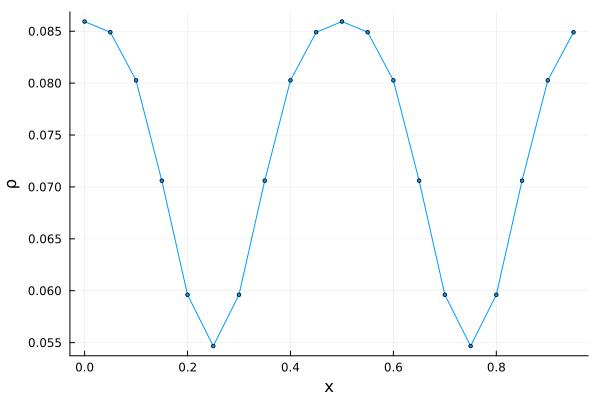

In [11]:
rvecs = collect(r_vectors(basis))[:, 1, 1]  # slice along the x axis
x = [r[1] for r in rvecs]                   # only keep the x coordinate
plot(x, scfres.ρ[:, 1, 1, 1], label="", xlabel="x", ylabel="ρ", marker=2)

For each term of the Hamiltonian $H$, respectively the potential $V$
there are also individual contributions to the total energy,
which is minimised. These components we can also inspect:

In [12]:
scfres.energies

Energy breakdown (in Ha):
    Kinetic             3.0842001 
    AtomicLocal         -2.3554937
    AtomicNonlocal      1.3116717 
    Ewald               -8.3979253
    PspCorrection       0.3948680 
    Hartree             0.5559238 
    Xc                  -3.1017279
    Entropy             -0.0000000

    total               -8.508483227626

## Post-processing quantities

Further important post-processing quantities, such as the density of states (`plot_dos`),
the computation of band structures (`compute_bands`)
or the computation of response properties such as Elastic constants are also
readily available in DFTK. See also the end of the General Tutorial for some examples
as well as a list of pointers where to go from here.